# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.head()

Unnamed: 0.1  Unnamed: 0 Organisation   
0             0           0       SpaceX  \
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   

                                            Location   
0         LC-39A, Kennedy Space Center, Florida, USA  \
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail   
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  \
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

In [7]:
df_data.shape

(4324, 9)

In [8]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [9]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [10]:
columns_to_drop = ['Unnamed: 0.1','Unnamed: 0']
df = df_data.drop(columns_to_drop, axis=1)

In [11]:
df.head()

Organisation                                           Location   
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA  \
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail   
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  \
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

## Descriptive Statistics

In [12]:
df.describe()

Organisation                                    Location   
count          4324                                        4324  \
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail   
count                         4324                                 4324  \
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status  Price Mission_Status  
count            4324    964           4324  
unique              2     56              4  
top     StatusRetired  450.0        Success  
freq             3534    136           3879

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [13]:
launch_count = df.Organisation.value_counts()
launch_count = launch_count.sort_values(ascending=False)

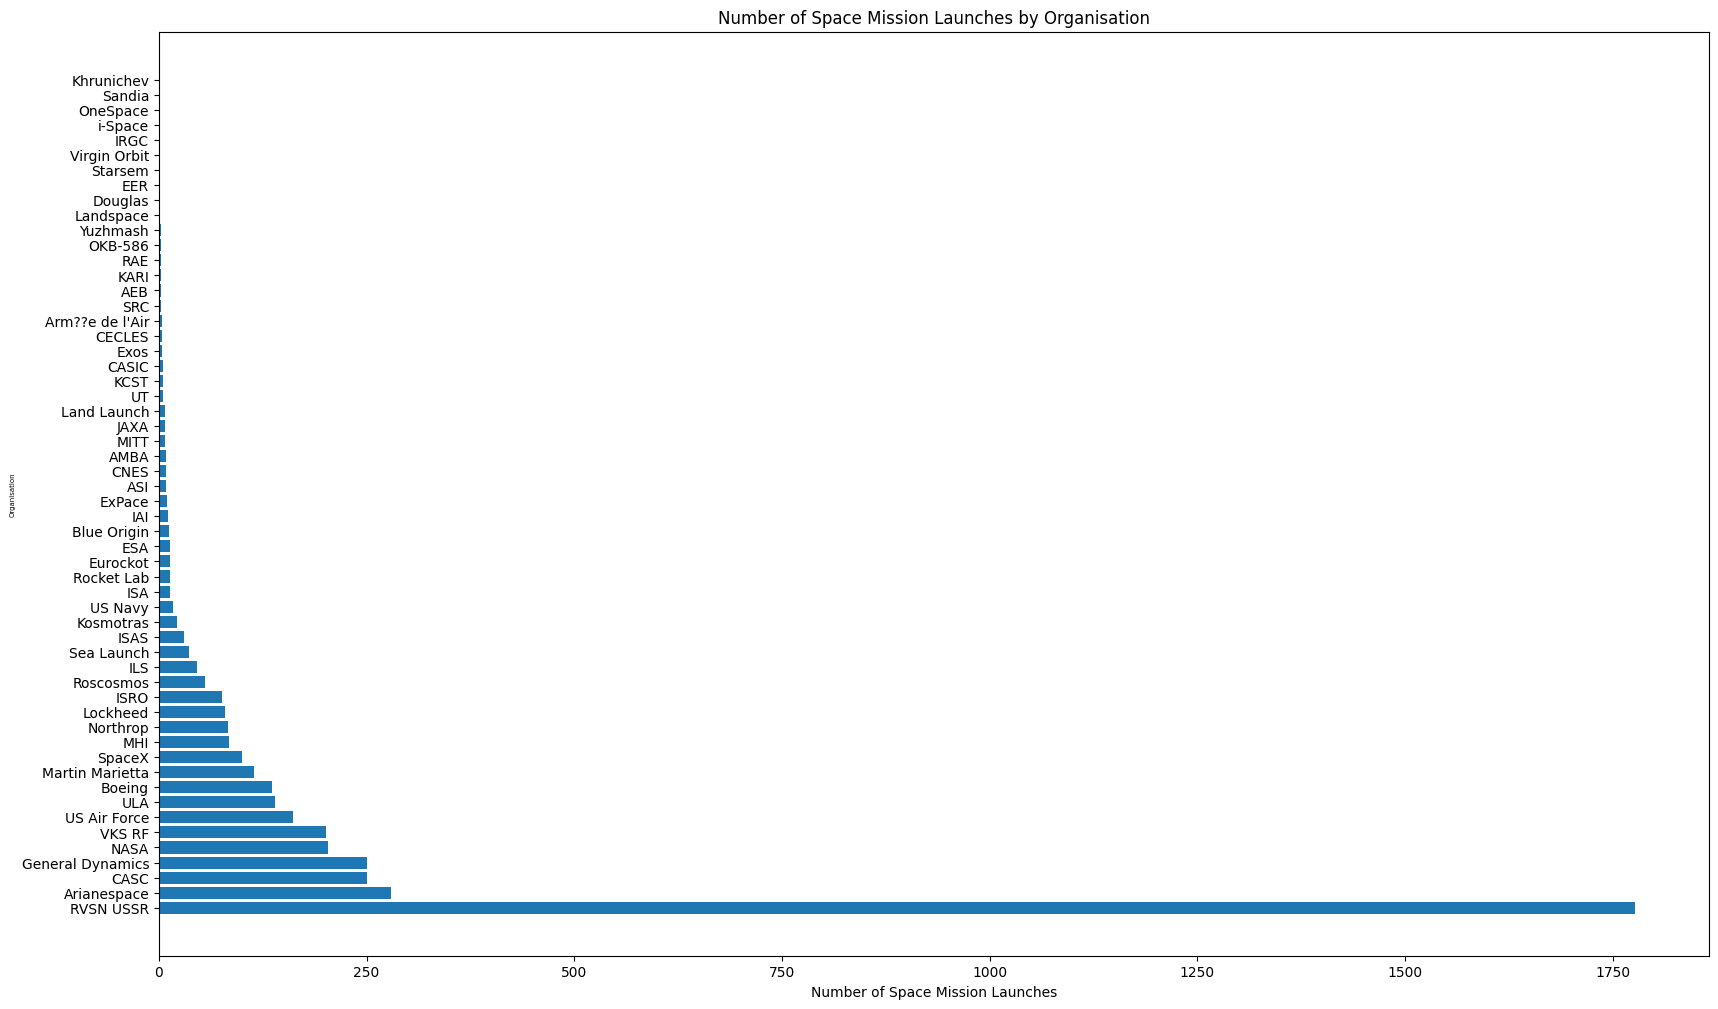

In [14]:
plt.figure(figsize=(20, 12)) 
plt.barh(launch_count.index, launch_count.values)
plt.ylabel('Organisation', fontsize=5)
plt.xlabel('Number of Space Mission Launches')
plt.title('Number of Space Mission Launches by Organisation')
plt.show()


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [15]:
active_rockets = df[df['Rocket_Status'] == 'StatusActive'].shape[0]
active_rockets = df['Rocket_Status'].value_counts()

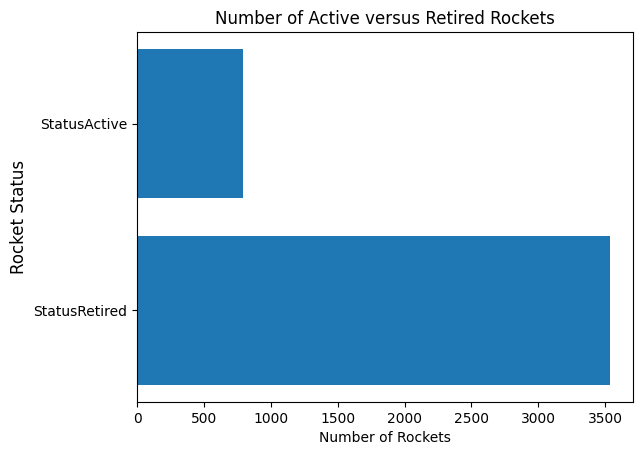

In [16]:
plt.barh(active_rockets.index, active_rockets.values)
plt.ylabel('Rocket Status', fontsize=12)
plt.xlabel('Number of Rockets')
plt.title('Number of Active versus Retired Rockets')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [17]:
mission_status = df[df['Mission_Status'] == 'Success'].shape[0]
mission_status = df['Mission_Status'].value_counts()

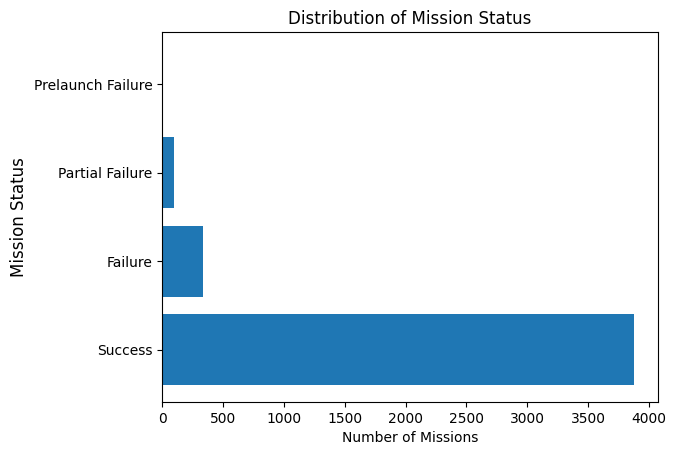

In [18]:
plt.barh(mission_status.index, mission_status.values)
plt.ylabel('Mission Status', fontsize=12)
plt.xlabel('Number of Missions')
plt.title('Distribution of Mission Status')
plt.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [19]:
df_clean = df.dropna(subset=['Price'])
df_clean.Price.isna().values.any()

False

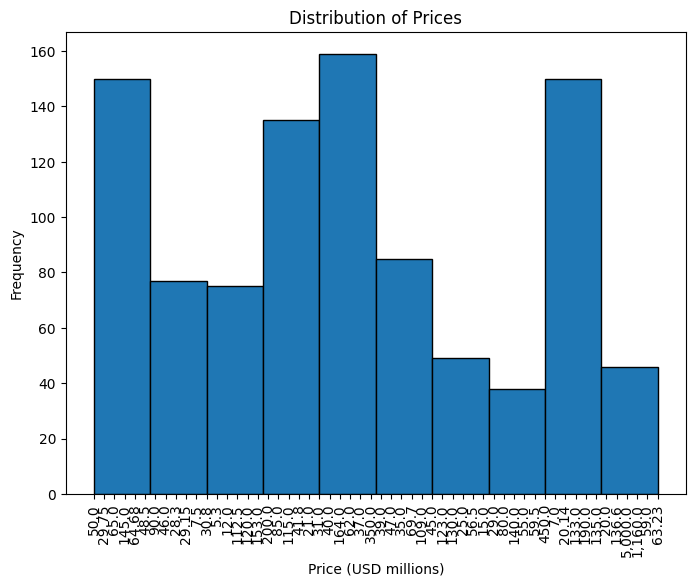

In [20]:
plt.figure(figsize=(8, 6))
plt.hist(df_clean["Price"], bins=10, edgecolor='black')

plt.xlabel('Price (USD millions)')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


In [21]:
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()
df_sorted = df.sort_values('Country')

In [22]:
fig = px.choropleth(df_sorted, locations='Country', locationmode='country names', color='Mission_Status',
                    projection='natural earth')
fig.update_layout(title_text='Choropleth Map', title_x=0.5)

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [23]:
fig = px.sunburst(df, path=['Location', 'Organisation', 'Mission_Status'])
fig.update_layout(title_text='Sunburst Chart - Countries, Organisations, and Mission Status')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [24]:
total_spending = df.groupby('Organisation')['Price'].sum()
print(total_spending)

Organisation
AEB                                                                 0
AMBA                                                                0
ASI                                                                 0
Arianespace         48.5200.048.5200.0200.0200.037.0200.037.0200.0...
Arm??e de l'Air                                                     0
Blue Origin                                                         0
Boeing                            133.0164.0164.0350.0133.0133.0164.0
CASC                29.7564.6829.1529.7564.6829.1529.7530.829.755....
CASIC                                                               0
CECLES                                                              0
CNES                                                                0
Douglas                                                             0
EER                                                              20.0
ESA                                                              37.0
Eurocko

# Analyse the Amount of Money Spent by Organisation per Launch

In [25]:
money_spent = df_data[df_data["Price"].notna()].copy()
money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

In [26]:
organisation_expense = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_expense.sort_values("Price", ascending=False)
organisation_expense.head()

Organisation  Price
0  Arianespace 170.26
1       Boeing 177.29
2         CASC  40.13
3          EER  20.00
4          ESA  37.00

# Chart the Number of Launches per Year

In [95]:
import datetime

def extract_year(date_str):
    try:
        dt = datetime.datetime.strptime(date_str, "%a %b %d, %Y %H:%M %Z")
    except ValueError:
        dt = datetime.datetime.strptime(date_str, "%a %b %d, %Y")
    return dt.year

df['Year'] = df['Date'].apply(extract_year)


In [96]:
ds = df['Year'].value_counts().reset_index()
ds.columns = [
    'Year', 
    'Count'
]
fig = px.bar(
    ds, 
    x='Year', 
    y="Count", 
    orientation='v', 
    title='Number Of launches Per Year' 
)
fig.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [128]:
def extract_year(date_str):
    try:
        dt = datetime.datetime.strptime(date_str, "%a %b %d, %Y %H:%M %Z")
    except ValueError:
        dt = datetime.datetime.strptime(date_str, "%a %b %d, %Y")
    return dt.month

df['Month'] = df['Date'].apply(extract_year)

In [98]:
month_on_month = df['Month'].value_counts().reset_index()
month_on_month.columns = [
    'Month', 
    'Count'
]
fig = px.bar(
    month_on_month, 
    x='Month', 
    y="Count", 
    orientation='v', 
    title='Sum of total missions in each Month',
    color='Count'
)
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [99]:
month_on_month.max()

Month     12
Count    450
dtype: int64

In [100]:
month_on_month.min()

Month      1
Count    268
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [101]:
df_price = df.sort_values(by='Price', ascending=False)

In [102]:
fig = px.line(df_price, x='Price', y='Year', title='Sales Trend')
fig.show()

In [106]:
avg_price = df[df["Price"].notna()]
pd.options.mode.chained_assignment = None
avg_price["Price"] = avg_price["Price"].str.replace(',', '').astype(float)

avg_price.drop(columns=['Detail','year', 'Location', 'Organisation', 'Country','Date','Rocket_Status','Mission_Status'], inplace=True)
avg_price.head()

Price  Year  Month
0  50.00  2020      8
1  29.75  2020      8
3  65.00  2020      7
4 145.00  2020      7
5  64.68  2020      7

<Axes: xlabel='Year'>

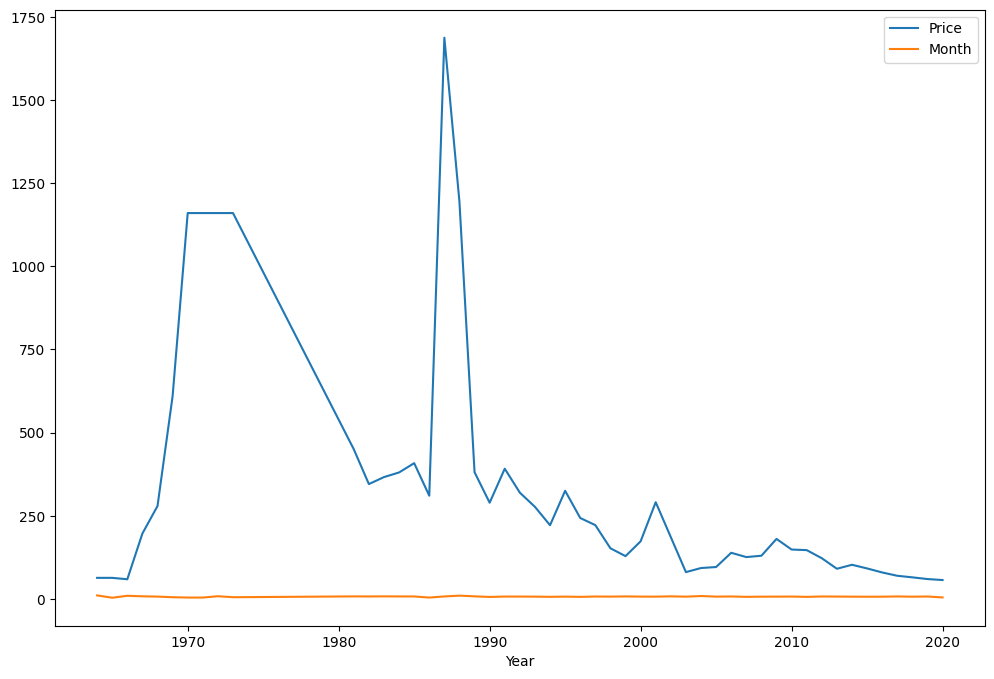

In [108]:
avg_price.groupby("Year").mean().plot(figsize=(12, 8))

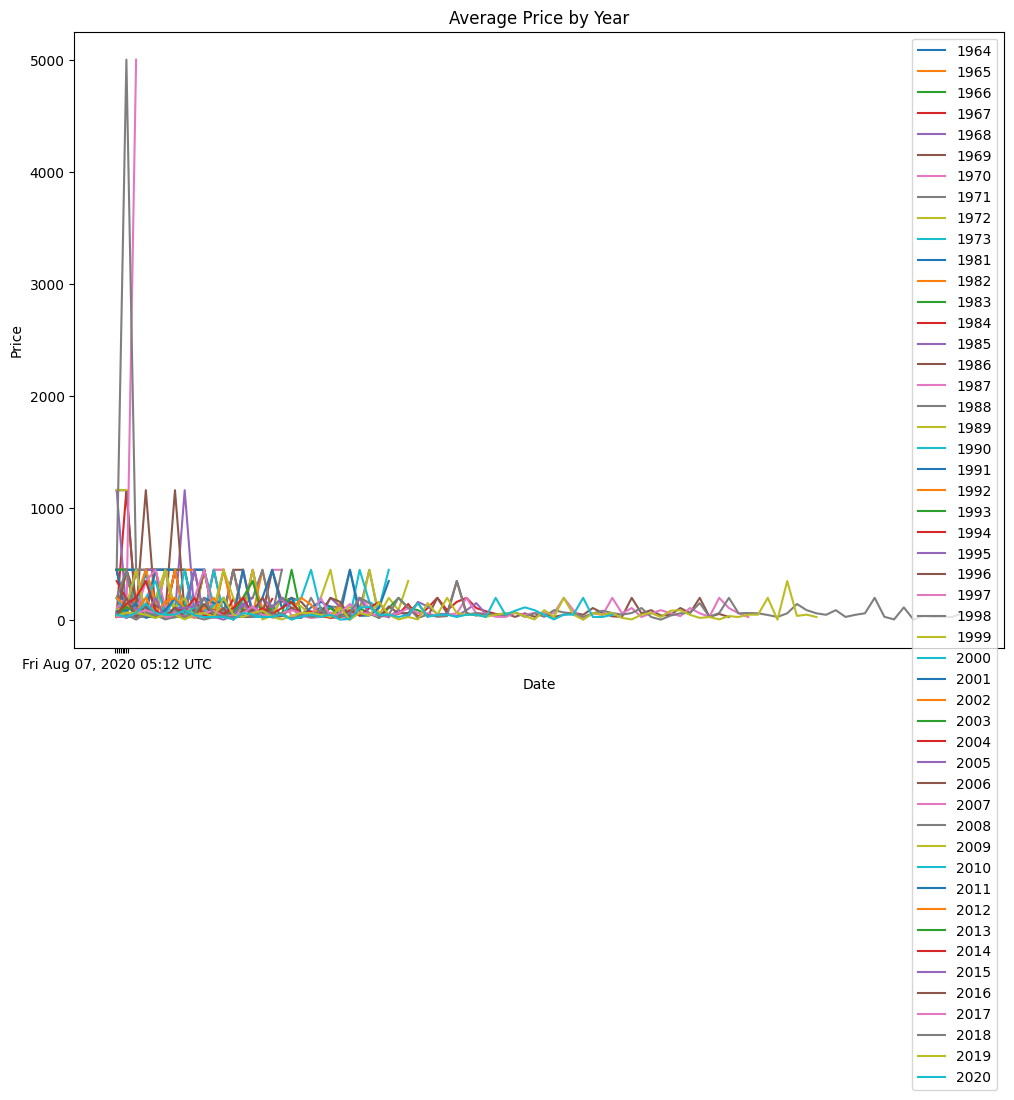

In [73]:
groups = avg_price.groupby("Year")
fig, ax = plt.subplots(figsize=(12, 8))
for year, group in groups:
    group.plot(x="Date", y="Price", ax=ax, label=year)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Average Price by Year")
ax.legend()
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [74]:
df.head()

Organisation                                           Location   
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA  \
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail   
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  \
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status     Country  Year Month  year  
0  StatusActive   50.0        Success         USA  2020   Aug  2020  
1  StatusActive  29.75        Success       China  2020   Aug  2020  
2  StatusActive    NaN        Success         USA  2020   Aug  2020  
3  StatusActive   65.0        Success  Kazakhstan  2020   Jul  2020  
4  StatusActive  145.0        Success         USA  2020   Jul  2020

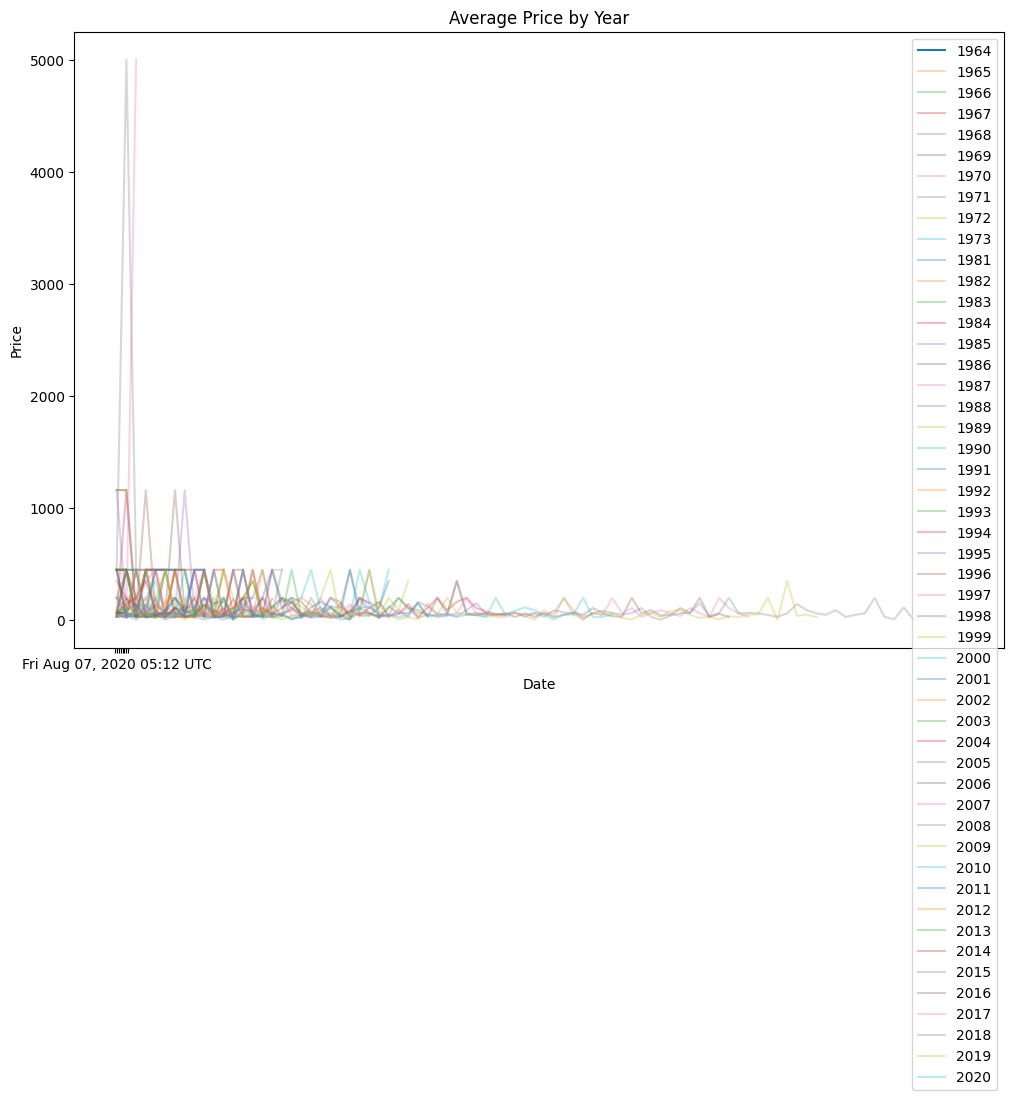

In [70]:
groups = avg_price.groupby("Year")
fig, ax = plt.subplots(figsize=(12, 8))

# Initialize the color palette
colors = plt.cm.tab10.colors

for i, (year, group) in enumerate(groups):
    # Set the alpha value based on whether the year is selected or not
    alpha = 1.0 if i == 0 else 0.3

    # Plot the data for the year with the specified color and alpha value
    group.plot(x="Date", y="Price", ax=ax, label=year, color=colors[i%10], alpha=alpha)

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.set_title("Average Price by Year")

# Show the legend
ax.legend()

# Function to update the alpha values on click
def onclick(event):
    # Get the index of the clicked line
    index = event.ind[0]

    # Update the alpha values of all lines
    for i, line in enumerate(ax.lines):
        line.set_alpha(1.0 if i == index else 0.3)

    # Redraw the figure
    fig.canvas.draw()

# Connect the onclick event to the figure
fig.canvas.mpl_connect('pick_event', onclick)

# Display the plot
plt.show()

In [120]:
top_10_org = pd.DataFrame(columns=df.columns)

for val in df.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index:
    print(val)
    org = df[df.Organisation == val]
    top_10_org = pd.concat([top_10, org], ignore_index=True)

top_10_org

RVSN USSR
Arianespace
General Dynamics
CASC
NASA
VKS RF
US Air Force
ULA
Boeing
Martin Marietta


Organisation                                  Location   
0           RVSN USSR    Site 41/1, Plesetsk Cosmodrome, Russia  \
1           RVSN USSR    Site 43/3, Plesetsk Cosmodrome, Russia   
2           RVSN USSR    Site 43/3, Plesetsk Cosmodrome, Russia   
3           RVSN USSR    Site 32/1, Plesetsk Cosmodrome, Russia   
4           RVSN USSR    Site 43/3, Plesetsk Cosmodrome, Russia   
...               ...                                       ...   
3622  Martin Marietta  SLC-41, Cape Canaveral AFS, Florida, USA   
3623  Martin Marietta  SLC-41, Cape Canaveral AFS, Florida, USA   
3624  Martin Marietta  SLC-41, Cape Canaveral AFS, Florida, USA   
3625  Martin Marietta  SLC-40, Cape Canaveral AFS, Florida, USA   
3626  Martin Marietta  SLC-40, Cape Canaveral AFS, Florida, USA   

                            Date   
0     Wed Aug 12, 1998 12:53 UTC  \
1     Thu Aug 29, 1996 05:22 UTC   
2     Wed Aug 02, 1995 23:59 UTC   
3     Mon Jul 13, 1992 17:41 UTC   
4     Wed Jul 08, 1992 09:53 UTC   
...                          ...   
3622  Fri Aug 26, 1966 13:59 UTC   
3623  Thu Jun 16, 1966 14:00 UTC   
3624  Tue Dec 21, 1965 14:00 UTC   
3625  Fri Oct 15, 1965 17:23 UTC   
3626  Fri Jun 18, 1965 14:00 UTC   

                                                 Detail  Rocket_Status Price   
0                Molniya-M /Block ML | Molniya-1 n†­133  StatusRetired   NaN  \
1     Molniya-M /Block SO-L | Interbol 2, Magion5 & ...  StatusRetired   NaN   
2         Molniya-M /Block SO-L | Interbol 1 & Magion 4  StatusRetired   NaN   
3                       Tsyklon-3 | Cosmos 2197 to 2202  StatusRetired   NaN   
4                    Molniya-M /Block 2BL | Cosmos 2196  StatusRetired   NaN   
...                                                 ...            ...   ...   
3622                  Titan IIIC | IDCSP-1 8-14, GGTS-2  StatusRetired   NaN   
3623                Titan IIIC | OPS 9311-9317 & GGTS-1  StatusRetired   NaN   
3624             Titan IIIC | LES 3 & 4, OV2-3, OSCAR-4  StatusRetired   NaN   
3625                         Titan IIIC | LCS-2 & OV2-1  StatusRetired   NaN   
3626                           Titan IIIC | Transtage 5  StatusRetired   NaN   

       Mission_Status Country  Year Month  year  
0             Success  Russia  1998     8  1998  
1             Success  Russia  1996     8  1996  
2             Success  Russia  1995     8  1995  
3             Success  Russia  1992     7  1992  
4             Success  Russia  1992     7  1992  
...               ...     ...   ...   ...   ...  
3622          Failure     USA  1966     8  1966  
3623          Success     USA  1966     6  1966  
3624  Partial Failure     USA  1965    12  1965  
3625          Failure     USA  1965    10  1965  
3626          Success     USA  1965     6  1965  

[3627 rows x 11 columns]

In [160]:
def extract_year(date_str):
    try:
        dt = datetime.datetime.strptime(date_str, "%a %b %d, %Y %H:%M %Z")
    except ValueError:
        dt = datetime.datetime.strptime(date_str, "%a %b %d, %Y")
    return dt.decade

In [161]:
df[df.Organisation=="CASC"]
top_10_org.groupby("Organisation").count().sort_values("Date",ascending=False)[:10].index
px.histogram(top_10_org.sort_values(by=["Organisation", "Date"], ascending=[True, False]),
             x="Organisation",
             color='Organisation',
             nbins=10) 


# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [189]:
df['Country'].unique()
countries_to_replace = ['Kazakhstan', 'Russia']
df.loc[df['Country'].isin(countries_to_replace), 'Country'] = 'Russia'

0          USA
1        China
2          USA
3       Russia
4          USA
         ...  
4319       USA
4320       USA
4321       USA
4322    Russia
4323    Russia
Name: Country, Length: 4324, dtype: object

In [190]:
CW_df = df[(df['Country']=='USA') | (df['Country']=='Russia')]

In [191]:
war = CW_df.sort_values("Year")
war[(war.Year <= 1991)]

Organisation                                    Location   
4323         RVSN USSR   Site 1/5, Baikonur Cosmodrome, Kazakhstan  \
4322         RVSN USSR   Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4321           US Navy    LC-18A, Cape Canaveral AFS, Florida, USA   
4293      US Air Force     LC-11, Cape Canaveral AFS, Florida, USA   
4294              AMBA      LC-5, Cape Canaveral AFS, Florida, USA   
...                ...                                         ...   
1755              NASA  LC-39A, Kennedy Space Center, Florida, USA   
1754  General Dynamics     SLC-3W, Vandenberg AFB, California, USA   
1753         RVSN USSR      Site 32/2, Plesetsk Cosmodrome, Russia   
1762         RVSN USSR      Site 43/3, Plesetsk Cosmodrome, Russia   
1751         RVSN USSR      Site 32/2, Plesetsk Cosmodrome, Russia   

                            Date                                  Detail   
4323  Fri Oct 04, 1957 19:28 UTC              Sputnik 8K71PS | Sputnik-1  \
4322  Sun Nov 03, 1957 02:30 UTC              Sputnik 8K71PS | Sputnik-2   
4321  Fri Dec 06, 1957 16:44 UTC                 Vanguard | Vanguard TV3   
4293  Thu Dec 18, 1958 23:02 UTC                    SM-65B Atlas | SCORE   
4294  Sat Dec 06, 1958 05:44 UTC                     Juno II | Pioneer 3   
...                          ...                                     ...   
1755  Sun Apr 28, 1991 11:33 UTC        Space Shuttle Discovery | STS-39   
1754  Tue May 14, 1991 15:52 UTC         Atlas-E/F Star-37S-ISS | NOAA-D   
1753  Thu May 16, 1991 21:40 UTC         Tsyklon-3 | Cosmos 2143 to 2148   
1762  Fri Mar 22, 1991 12:19 UTC  Molniya-M /Block ML | Molniya-3 n†­148   
1751  Tue Jun 04, 1991 09:00 UTC                     Tsyklon-3 | Okean 3   

      Rocket_Status  Price   Mission_Status Country  Year  Month  year  
4323  StatusRetired    NaN          Success  Russia  1957     10  1957  
4322  StatusRetired    NaN          Success  Russia  1957     11  1957  
4321  StatusRetired    NaN          Failure     USA  1957     12  1957  
4293  StatusRetired    NaN          Success     USA  1958     12  1958  
4294  StatusRetired    NaN  Partial Failure     USA  1958     12  1958  
...             ...    ...              ...     ...   ...    ...   ...  
1755  StatusRetired  450.0          Success     USA  1991      4  1991  
1754  StatusRetired    NaN          Success     USA  1991      5  1991  
1753  StatusRetired    NaN          Success  Russia  1991      5  1991  
1762  StatusRetired    NaN          Success  Russia  1991      3  1991  
1751  StatusRetired    NaN          Success  Russia  1991      6  1991  

[2432 rows x 11 columns]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [192]:
CW_df["Country"].value_counts().rename_axis("Country").reset_index(name='counts')

Country  counts
0  Russia    2096
1     USA    1344

([<matplotlib.patches.Wedge at 0x7f5194b95150>,
 [Text(-0.37034241843976107, 1.0357830337981933, 'Russia'),
  Text(0.3703425154167657, -1.035782999124229, 'USA')])

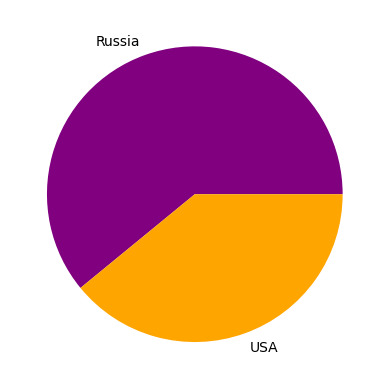

In [199]:
colors = ["purple", "orange"]
grouping = CW_df.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

<Axes: xlabel='year'>

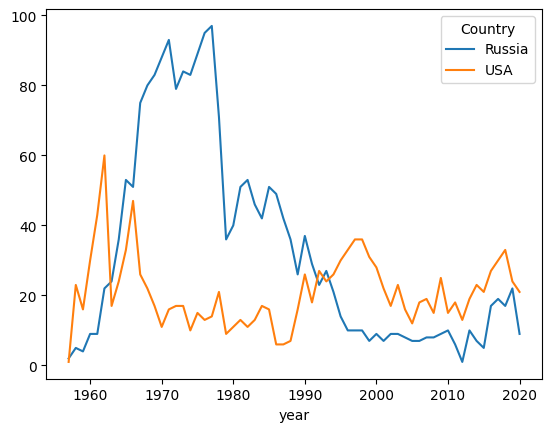

In [202]:
CW_df.groupby(["year", "Country"]).size().unstack().plot()

## Chart the Total Number of Mission Failures Year on Year.

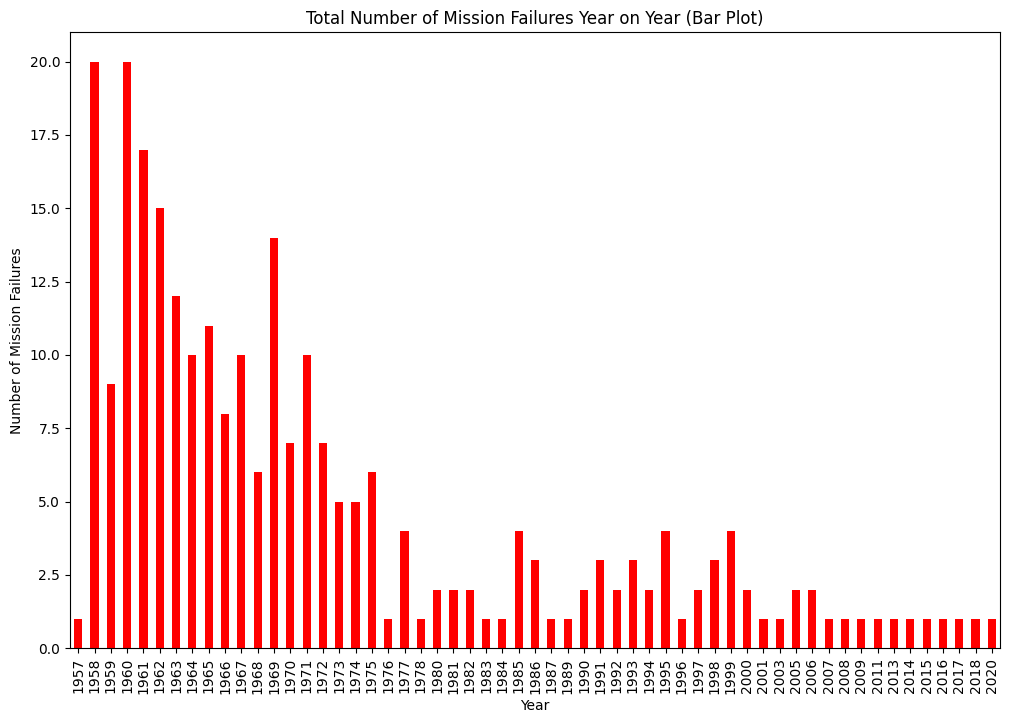

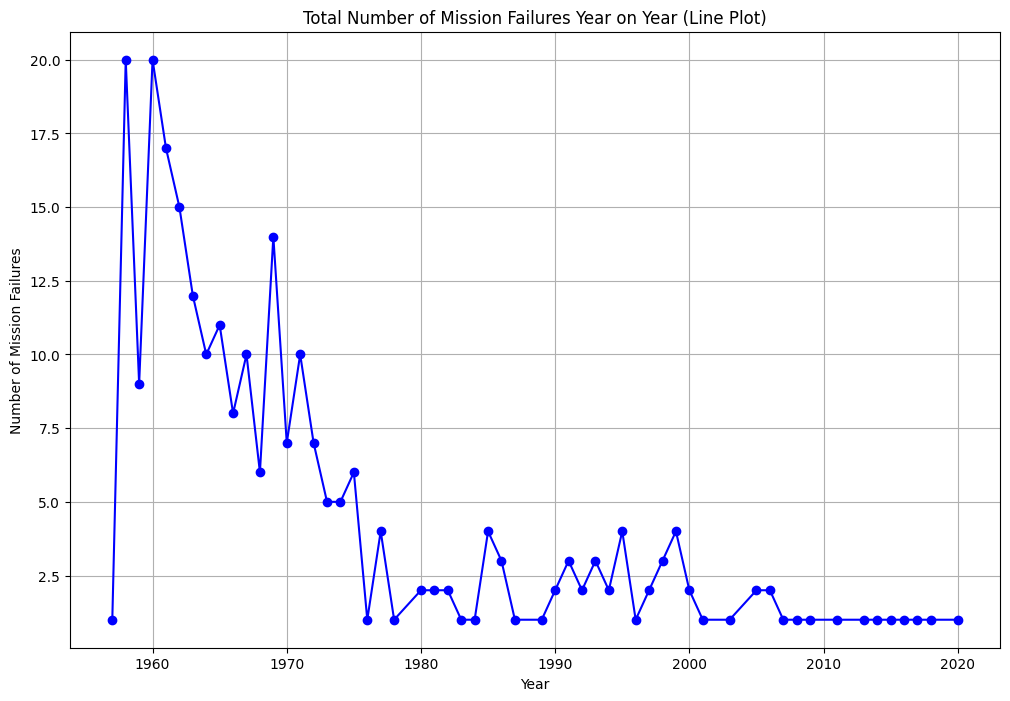

In [206]:
mission_failures = CW_df[CW_df['Mission_Status'] == 'Failure']
failures_yearly = mission_failures.groupby('Year').size()

plt.figure(figsize=(12, 8))
failures_yearly.plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Mission Failures')
plt.title('Total Number of Mission Failures Year on Year (Bar Plot)')
plt.show()

plt.figure(figsize=(12, 8))
failures_yearly.plot(kind='line', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Mission Failures')
plt.title('Total Number of Mission Failures Year on Year (Line Plot)')
plt.grid(True)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

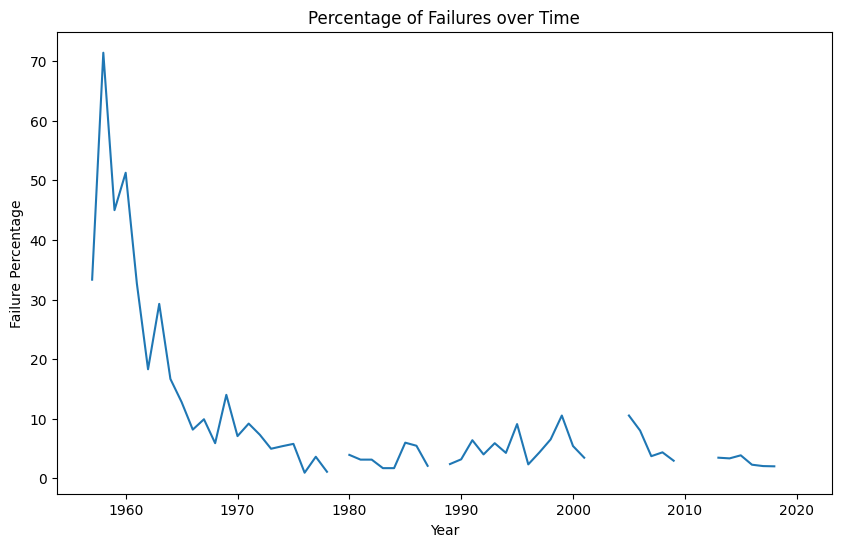

In [210]:
total_missions = CW_df.groupby('year').size()
failures = CW_df[CW_df['Mission_Status'] == 'Failure'].groupby('year').size()
failure_percentage = (failures / total_missions) * 100

failure_percentage.plot(kind='line', figsize=(10, 6))
plt.title('Percentage of Failures over Time')
plt.xlabel('Year')
plt.ylabel('Failure Percentage')
plt.show()


# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [217]:
df.Country.nunique()

21

In [218]:
df.head()

Organisation                                           Location   
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA  \
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail   
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  \
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status Country  Year  Month  year  
0  StatusActive   50.0        Success     USA  2020      8  2020  
1  StatusActive  29.75        Success   China  2020      8  2020  
2  StatusActive    NaN        Success     USA  2020      8  2020  
3  StatusActive   65.0        Success  Russia  2020      7  2020  
4  StatusActive  145.0        Success     USA  2020      7  2020

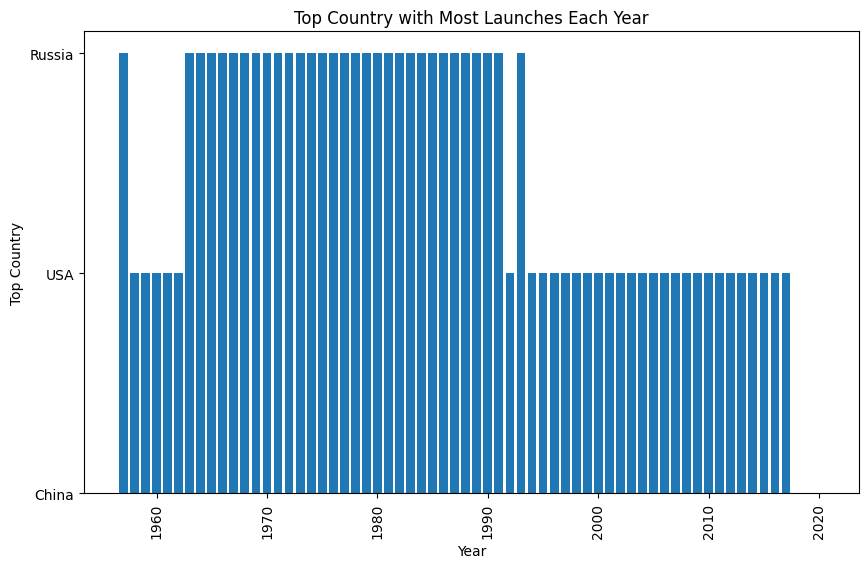

In [224]:
top_countries = []

for year in df['Year'].unique():
    year_data = df[df['Year'] == year]
    top_country = year_data['Country'].value_counts().idxmax()
    top_countries.append((year, top_country))
    
top_countries_df = pd.DataFrame(top_countries, columns=['Year', 'Top Country'])

plt.figure(figsize=(10, 6))
plt.bar(top_countries_df['Year'], top_countries_df['Top Country'])
plt.xlabel('Year')
plt.ylabel('Top Country')
plt.title('Top Country with Most Launches Each Year')

plt.xticks(rotation=90)
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [249]:
org_launches = df.groupby("year")["Organisation"].value_counts().rename_axis(["year", "Organisation"]).reset_index(name='counts')
org_launches.loc[org_launches.groupby("year")["counts"].idxmax()]
org_launches.head()

year Organisation  counts
0  1957    RVSN USSR       2
1  1957      US Navy       1
2  1958      US Navy      12
3  1958         AMBA       7
4  1958    RVSN USSR       5

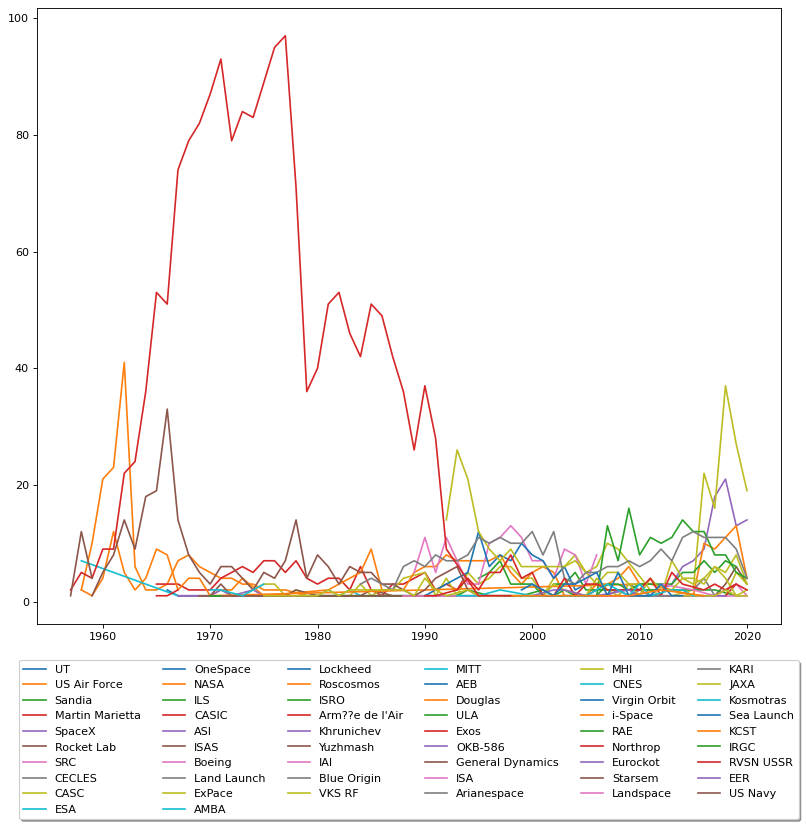

In [251]:
org_set = set(org_launches['Organisation'])

plt.figure(figsize=(12, 10), dpi=80)
for org in org_set:
    selected_data = org_launches.loc[org_launches['Organisation'] == org]
    plt.plot(selected_data['year'], selected_data['counts'], label=org)
     
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)
plt.show()